<a href="https://colab.research.google.com/github/asmyasikova83/data_analysis/blob/main/ML_1_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML sminars
#github.com/esokolov/ml-course-hse/blob/master/2018-fall/seminars/

##numpy

In [683]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [684]:
vec = np.array([1, 2, 3])
vec.ndim # количество осей
#vec

1

In [685]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.ndim

2

In [686]:
vec.shape

(3,)

In [687]:
mat.dtype.name

'int64'

In [688]:
mat.itemsize

8

In [689]:
A = np.array([1, 2, 3], dtype=float)
A, A.dtype

(array([1., 2., 3.]), dtype('float64'))

In [690]:
np.linspace(2, 20, 6) # правая граница включается (по умолчанию)

array([ 2. ,  5.6,  9.2, 12.8, 16.4, 20. ])

In [691]:
A = np.arange(6).reshape(2, -1)
#A
np.hstack((A, A**2))
np.vstack((A, A**2))
np.concatenate((A, A**2), axis=1)

array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

In [692]:
a = np.arange(5)
np.tile(a, (2, 2))

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]])

In [693]:
A[np.logical_and(A != 7, A % 5 != 3)] # также можно использовать логические операции

array([0, 1, 2, 4, 5])

In [694]:
A = np.arange(120).reshape(10, -1)
A

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107],
       [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]])

In [695]:
A[::2]

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107]])

In [696]:
odd_columns = A[:, 1::2]
odd_columns[odd_columns % 3 != 0].flatten()

array([  1,   5,   7,  11,  13,  17,  19,  23,  25,  29,  31,  35,  37,
        41,  43,  47,  49,  53,  55,  59,  61,  65,  67,  71,  73,  77,
        79,  83,  85,  89,  91,  95,  97, 101, 103, 107, 109, 113, 115,
       119])

In [697]:
# Вычисление суммы диагональных элементов
diagonal_sum = np.trace(A)
diagonal_sum

585

##Scikit

## Ames Housing dataset, в котором требуется предсказать стоимость квартиры по ряду признаков (площадь, количество комнат, год постройки и т.д.)


#1. Загрузка данных

In [698]:
! wget https://www.dropbox.com/s/1ymnz6k1p0cezo7/house_prices.csv

--2024-06-14 09:58:53--  https://www.dropbox.com/s/1ymnz6k1p0cezo7/house_prices.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/xg7am4v3uj1pk2xr17def/house_prices.csv?rlkey=su22xu76idrm9fb2pjbjak2iu [following]
--2024-06-14 09:58:53--  https://www.dropbox.com/scl/fi/xg7am4v3uj1pk2xr17def/house_prices.csv?rlkey=su22xu76idrm9fb2pjbjak2iu
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7786014fc38dee72deb95445ca.dl.dropboxusercontent.com/cd/0/inline/CUz2YuYITdZpq-e_MnwnIv0vbjTAfKQd2UqZIN1uqE4PNUwAMkYZHTCF3xFlwlvGeQ2uHUoi2z9AWtK2a8HIPVqDw0ByKi94ZF4GNXZZzDKpTY3KNRx_gwNLUBC4TdNGbGY/file# [following]
--2024-06-14 09:58:54--  https://uc7786014fc38dee72deb95445ca.dl.dropboxusercontent.com/cd/0/inline/CUz2YuYIT

In [699]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')

%matplotlib inline

1. Загрузка данных

In [700]:
data = pd.read_csv('./house_prices.csv', index_col='Id')
data.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Для начала посмотрим на матрицу корреляций признаков и целевой переменной

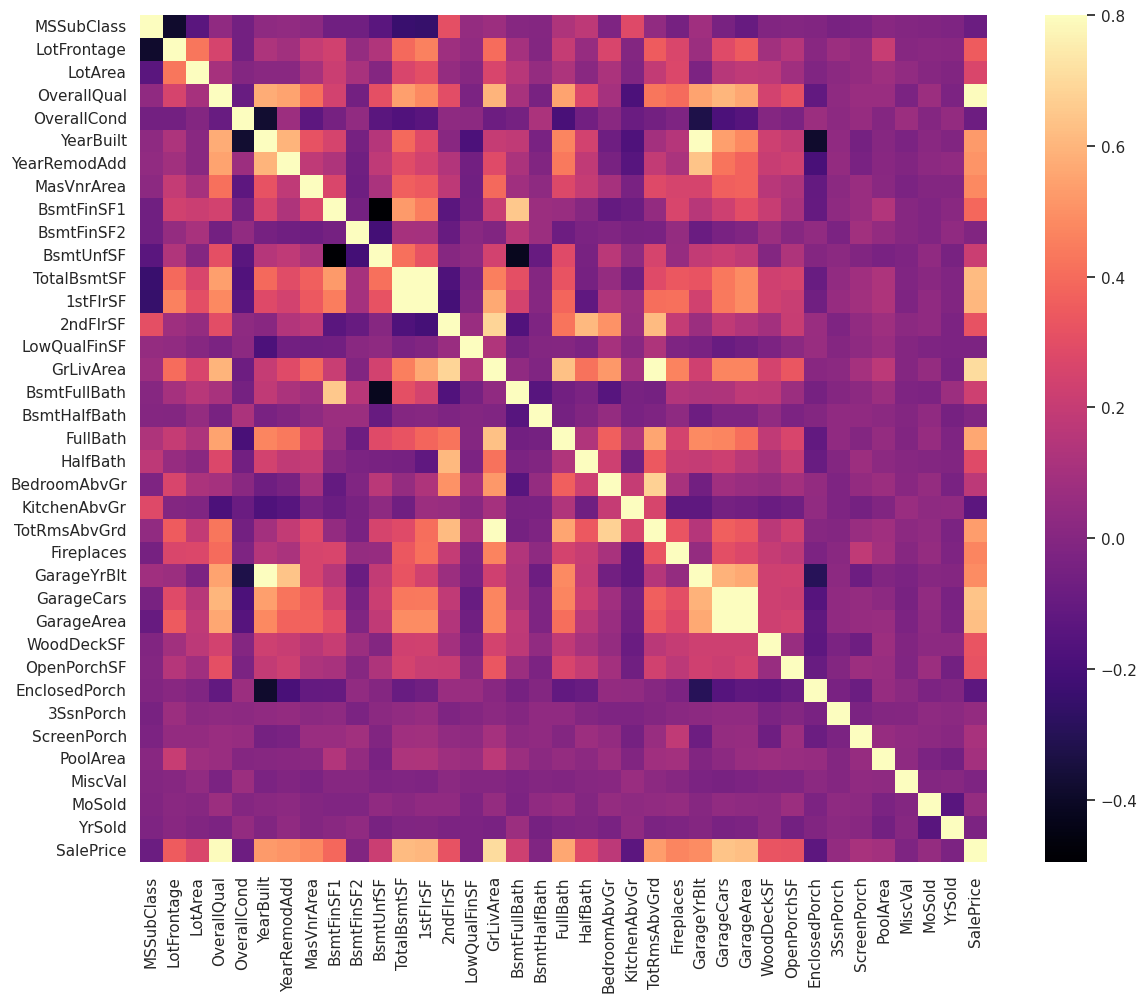

In [701]:
#extract cols with numeric data
data_numeric_columns = data.select_dtypes(include='number')
corr = data_numeric_columns.corr()
plt.figure(figsize=(15, 11))
sns.heatmap(corr, vmax=.8, square=True, cmap='magma');

Линейная зависимость признаков (мультиколлинеарность) приводит к существованию множества эквивалентных решений задачи регрессии, а значит, к нестабильности. Поэтому выбросим эти признаки

In [702]:
data.drop(['TotalBsmtSF', 'GarageYrBlt'], axis=1, inplace=True)

##2. Предобработка

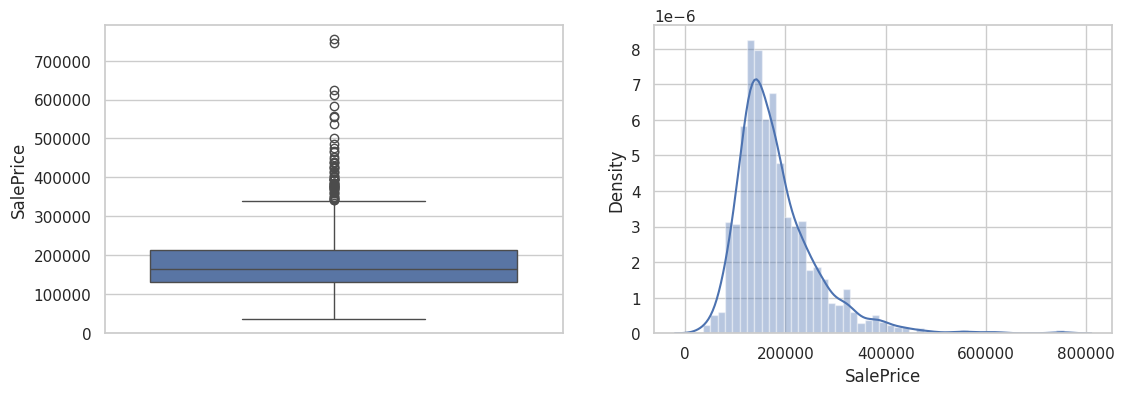

In [703]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['SalePrice'])
plt.subplot(1, 2, 2)
sns.distplot(data['SalePrice']);

Распределение цен имеет достаточно тяжелый правый хвост, в процессе оптимизации ошибка на таких объектах будет штрафоваться сильнее, поэтому прологарифмируем значение целевой переменной, чтобы получить более симметричное распределение.

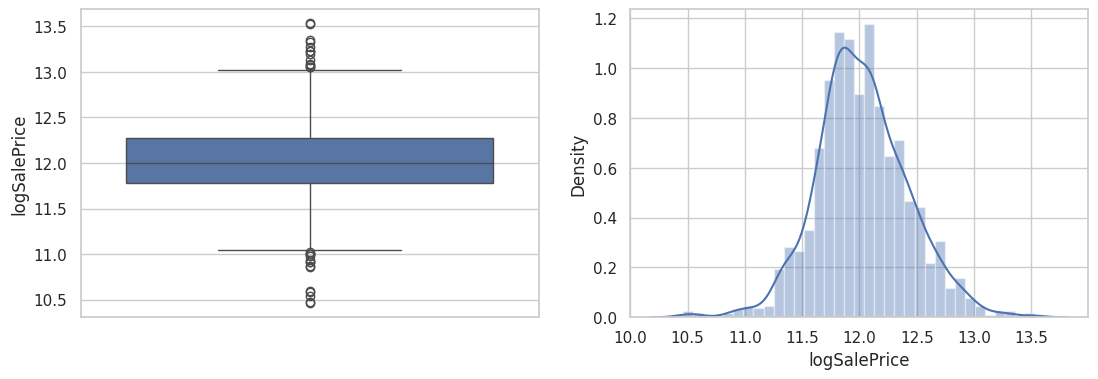

In [704]:
data['logSalePrice'] = np.log(data['SalePrice'])
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data['logSalePrice'])
plt.subplot(1, 2, 2)
sns.distplot(data['logSalePrice']);

**Пропуски в данных**

In [705]:
clmns = data.columns[data.isnull().any()]
missed = pd.DataFrame(data[clmns].isnull().sum().sort_values(ascending=False) / data.shape[0], columns=['% NULL'])
missed

,% NULL
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageType,0.055479
GarageFinish,0.055479
GarageQual,0.055479


Некоторые признаки отсутствуют для большого числа объектов, поэтому имеет смысл их выкинуть

In [706]:
data.drop(missed[missed['% NULL'] > 0.99].index, axis=1, inplace=True)

Оставшиеся пропуски заполним значением медианным значением для действительных признаков и модой для категориальных

In [707]:
fill = data.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
data = data.fillna(value=fill)

**Категориальные признаки**

 Практически все модели в машинном обучении предполагают, что данные представлены в числовом виде, поэтому такие признаки нужно сначала обработать, чтобы обучить регрессию. Один из самых простых и распространенных способов
 one-hot encoding, создающий для каждого категориального признака, принимающего
 различных значений, столько же бинарных признаков, при этом для каждого объекта ровно один из них (соответствующий значению исходного категориального признака на объекте) будет принимать значение 1, остальные будут равны нулю:

In [708]:
cat_clmns = data.columns[data.dtypes == 'object']
data[cat_clmns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal
4,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,MnPrv,Shed,WD,Abnorml
5,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,MnPrv,Shed,WD,Normal


Для описанного выше преобразования в scekit-learn существует объект OneHotEncoder, однако он работает только со значениями типа int, поэтому необходимо сначала для каждого признака пронумеровать уникальные значения и использовать эти номера вместо исходных значений признака (в этом нам поможет LabelEncoder)

In [709]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [710]:
encoders = [LabelEncoder().fit(data[c]) for c in cat_clmns]
cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(encoders, cat_clmns)]).T
cat_fts

array([[3, 1, 0, ..., 2, 8, 4],
       [3, 1, 0, ..., 2, 8, 4],
       [3, 1, 0, ..., 2, 8, 4],
       ...,
       [3, 1, 0, ..., 2, 8, 4],
       [3, 1, 0, ..., 2, 8, 4],
       [3, 1, 0, ..., 2, 8, 4]])

In [711]:
ohe = OneHotEncoder()
ohe.fit(cat_fts)
cat_ohe = ohe.transform(cat_fts).toarray()
cat_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [712]:
real_clmns = data.columns[data.dtypes != 'object']
a = pd.DataFrame(cat_ohe, index=data.index)
data = pd.concat([data[real_clmns], a], axis=1)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,238,239,240,241,242,243,244,245,246,247
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**3. Обучение**

In [713]:
yrsold = data['YrSold']
sorted(yrsold.unique())

[2006, 2007, 2008, 2009, 2010]

In [714]:
train_x = data[data['YrSold'] <= 2009]
test_x = data[data['YrSold'] == 2010]

test_y = test_x['SalePrice']
train_y = train_x['SalePrice']

test_x, train_x = test_x.drop(['SalePrice', 'logSalePrice'], axis=1), train_x.drop(['SalePrice', 'logSalePrice'], axis=1)
train_idxs, val_idxs = np.where(train_x['YrSold'] < 2009)[0], np.where(train_x['YrSold'] == 2009)[0]

In [715]:

print('train_size = %.2f' % (train_idxs.shape[0] * 1.0 / data.shape[0]))
print('val_size = %.2f' % (val_idxs.shape[0] * 1.0 / data.shape[0]))
print('test_size = %.2f' % (test_x.shape[0] * 1.0 / data.shape[0]))

train_size = 0.65
val_size = 0.23
test_size = 0.12


т.к. метрика RMSE штрафует по-разному занижение и завышение цены, в качестве целевой метрики мы будем использовать MAPE, которая показывает ошибку в процентах от истинного значения.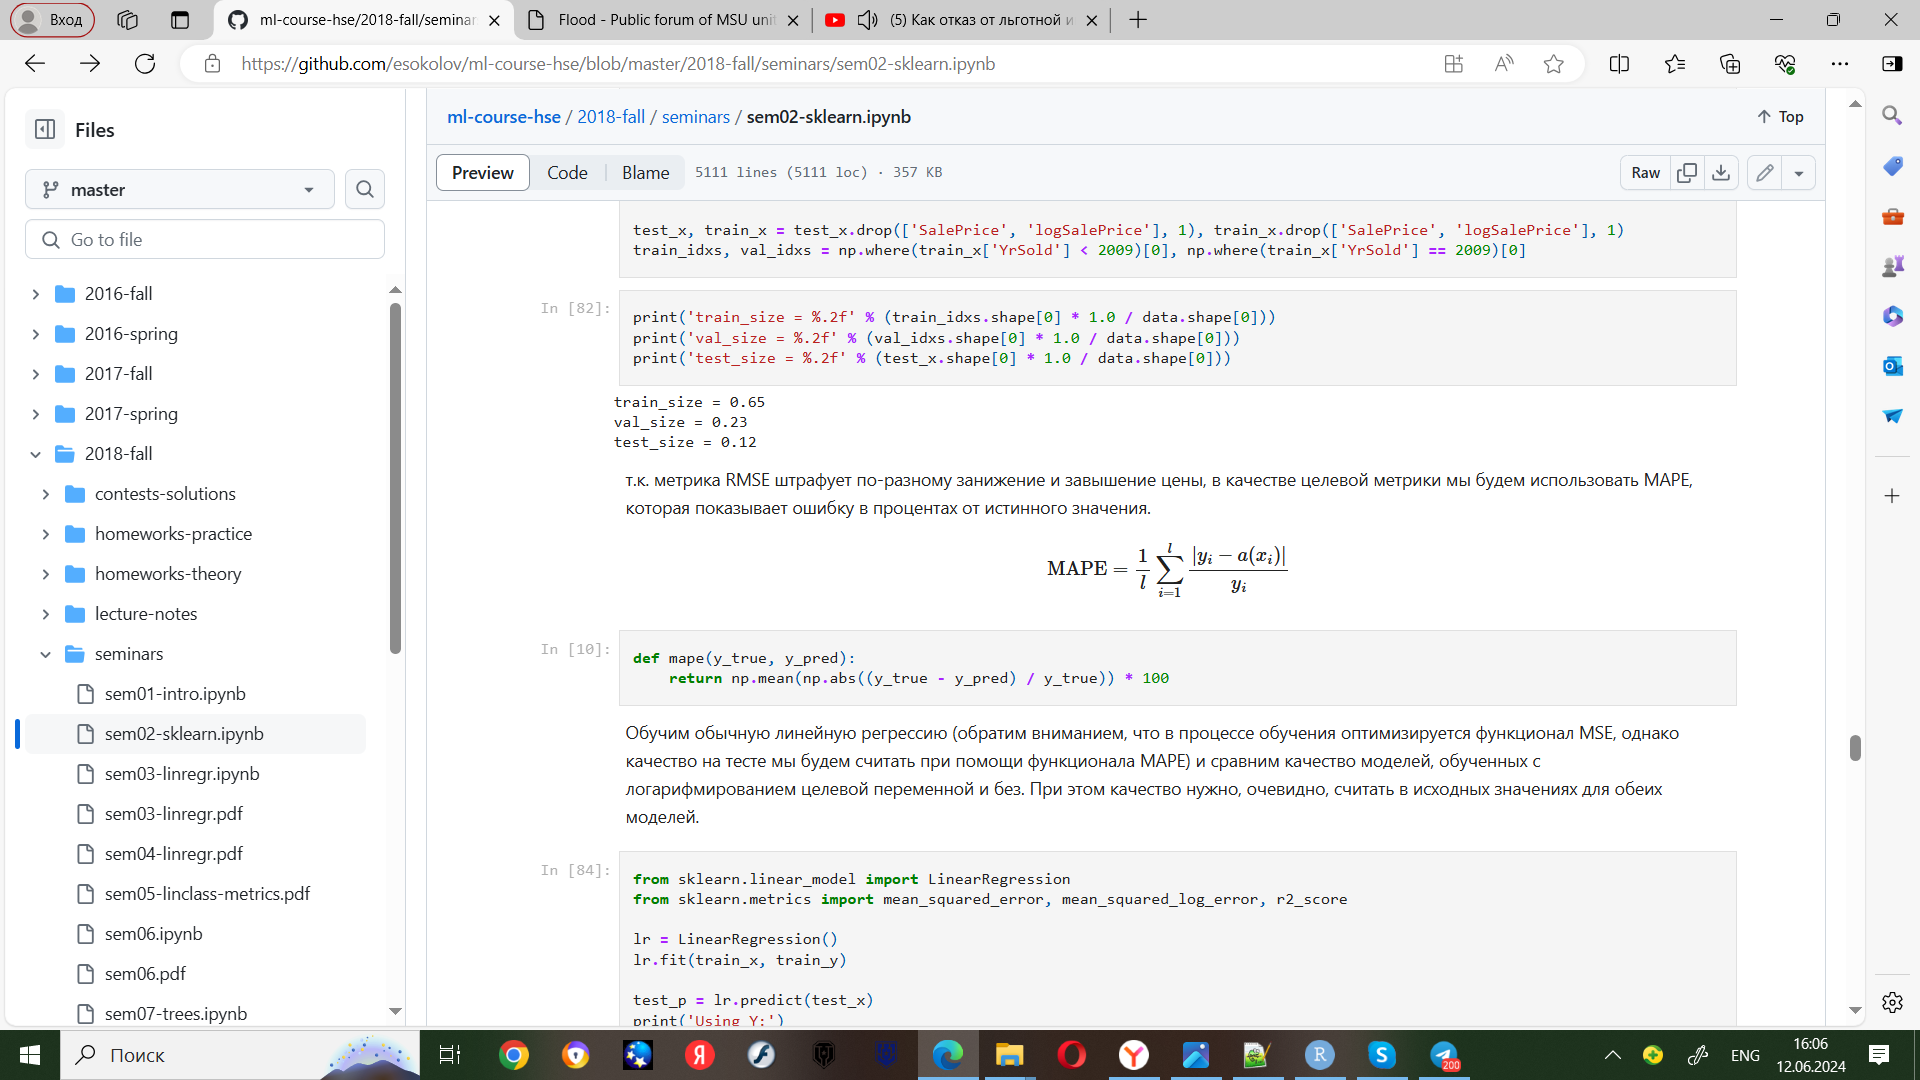

In [716]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Обучим обычную линейную регрессию (обратим вниманием, что в процессе обучения оптимизируется функционал MSE, однако качество на тесте мы будем считать при помощи функционала MAPE) и сравним качество моделей, обученных с логарифмированием целевой переменной и без. При этом качество нужно, очевидно, считать в исходных значениях для обеих моделей.

In [717]:
train_x.columns = train_x.columns.astype(str)

In [718]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score


lr = LinearRegression()
lr.fit(train_x, train_y)

test_x.columns = test_x.columns.astype(str)

test_p = lr.predict(test_x)
print('Using Y:')
print('Test MAPE %.2f%%' % mape(test_y, test_p))
print('Test RMSE %.3f' % mean_squared_error(test_y, test_p)**0.5)
print('Test RMSLE %.3f' % mean_squared_log_error(test_y, test_p)**0.5)
print('Test R2 %.3f\n' % r2_score(test_y, test_p))


lr.fit(train_x, np.log(train_y))
test_p = np.exp(lr.predict(test_x))
print('Using logY:')
print('Test MAPE %.2f%%' % mape(test_y, test_p))
print('Test RMSE %.3f' % mean_squared_error(test_y, test_p)**0.5)
print('Test RMSLE %.3f' % mean_squared_log_error(test_y, test_p)**0.5)
print('Test R2 %.3f' % r2_score(test_y, test_p))

Using Y:
Test MAPE 10.11%
Test RMSE 23851.172
Test RMSLE 0.136
Test R2 0.912

Using logY:
Test MAPE 8.73%
Test RMSE 22496.995
Test RMSLE 0.119
Test R2 0.921


**5. Подбор гиперпараметров**

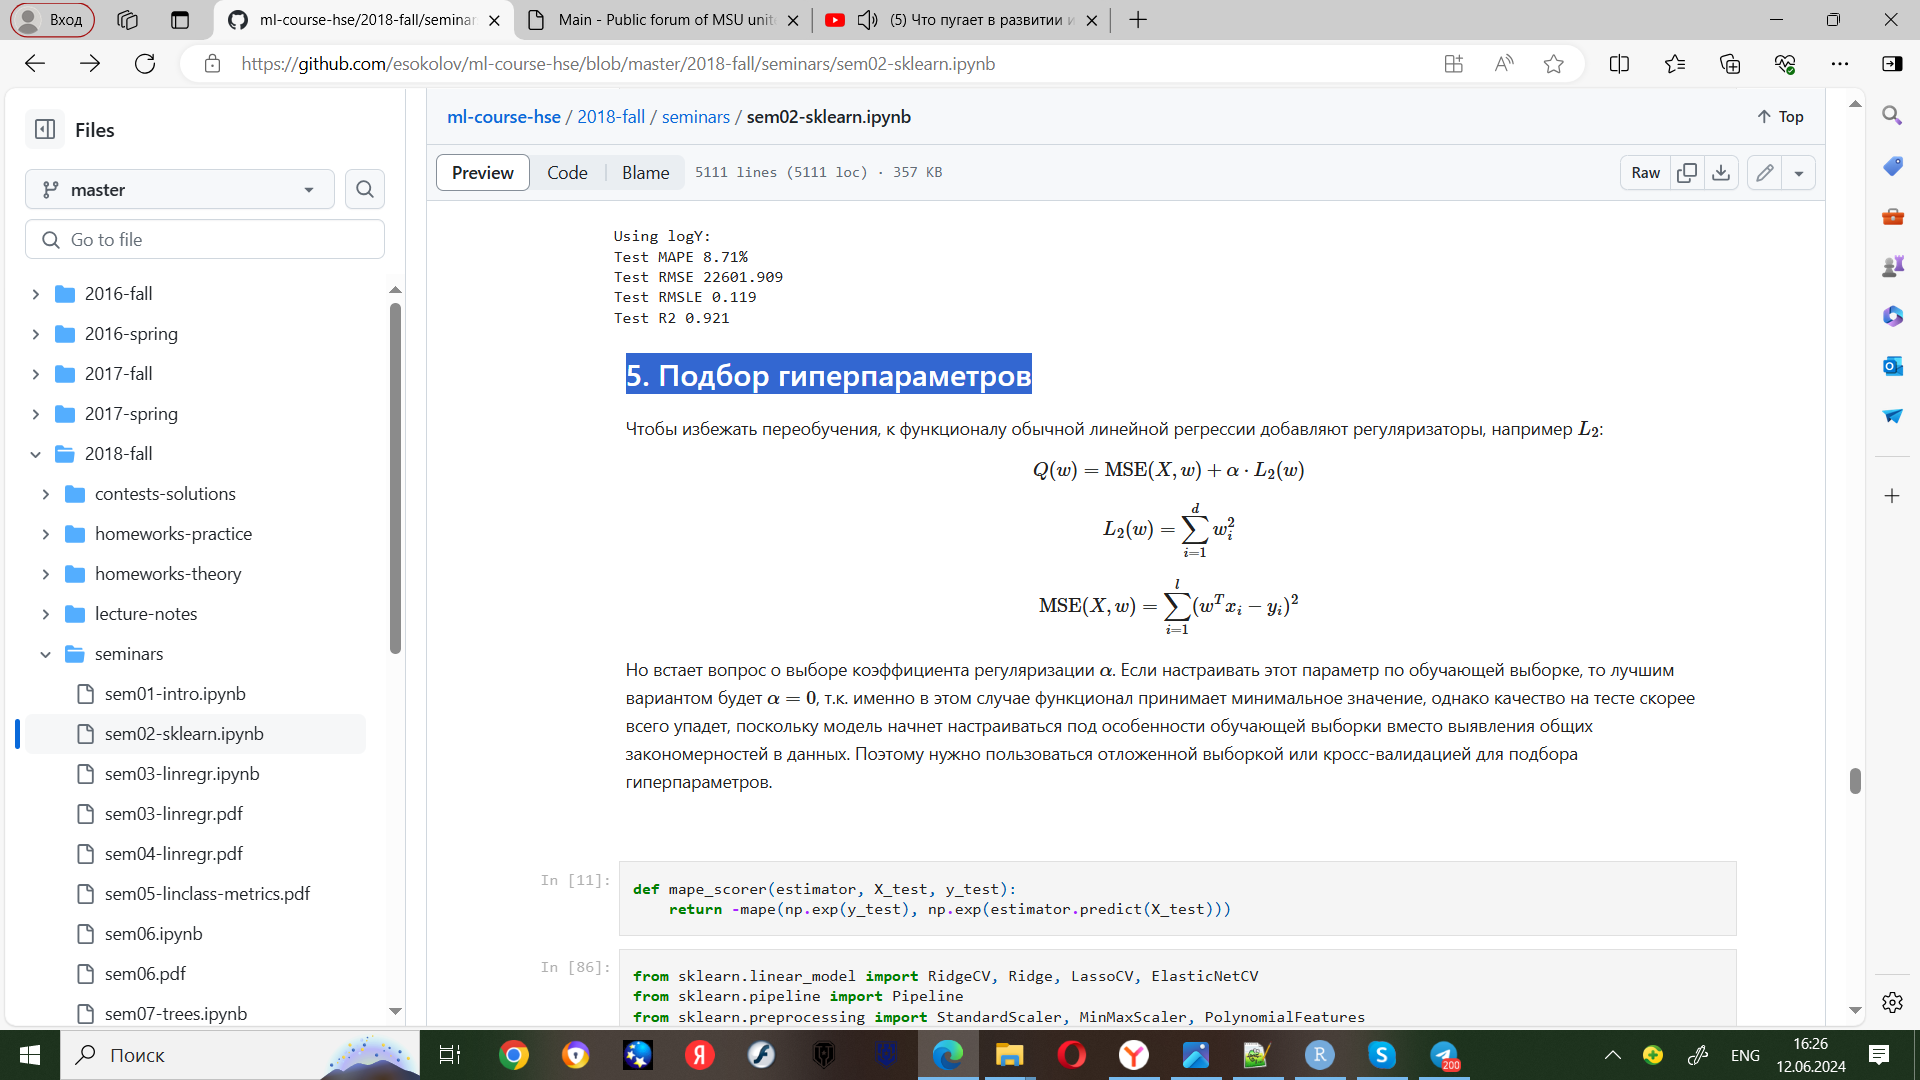

Но встает вопрос о выборе коэффициента регуляризации
. Если настраивать этот параметр по обучающей выборке, то лучшим вариантом будет
, т.к. именно в этом случае функционал принимает минимальное значение, однако качество на тесте скорее всего упадет, поскольку модель начнет настраиваться под особенности обучающей выборки вместо выявления общих закономерностей в данных. Поэтому нужно пользоваться отложенной выборкой или кросс-валидацией для подбора гиперпараметров.



In [719]:
def mape_scorer(estimator, X_test, y_test):
    return -mape(np.exp(y_test), np.exp(estimator.predict(X_test)))

In [720]:
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

params = [{
    'alpha': np.logspace(-6, 3, 20)
}
]

cv = GridSearchCV(Ridge(), params , cv=[[train_idxs, val_idxs]], scoring=mape_scorer)
cv.fit(train_x, np.log(train_y));

In [721]:
cv_grid = pd.DataFrame(cv.cv_results_['params'])
cv_grid['val MAPE'] = -cv.cv_results_['mean_test_score']
cv_grid

,alpha,val MAPE
0,0.000001,9.916952
1,0.000003,9.916952
2,0.000009,9.916952
3,0.000026,9.916953
4,0.000078,9.916954
5,0.000234,9.916956
6,0.000695,9.916959
7,0.002069,9.916943
8,0.006158,9.917396
9,0.018330,9.919958


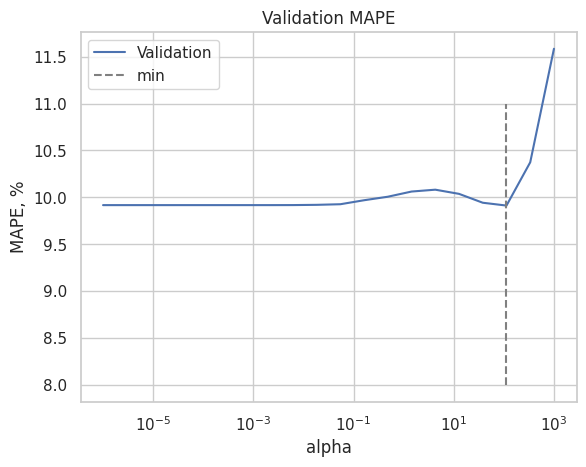

In [722]:
plt.title(r'Validation MAPE')
plt.semilogx(cv_grid['alpha'], cv_grid['val MAPE'], label='Validation')

best_l2 = cv.best_params_['alpha']
plt.vlines(best_l2, 8, 11, linestyles='--', color='gray', label='min')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MAPE, %');

In [723]:
print('Test MAPE %.3f' % -mape_scorer(cv, test_x, np.log(test_y)))

Test MAPE 9.724


Посмотрим на 10 самых значимых признаков и их корреляции с целевой переменной:

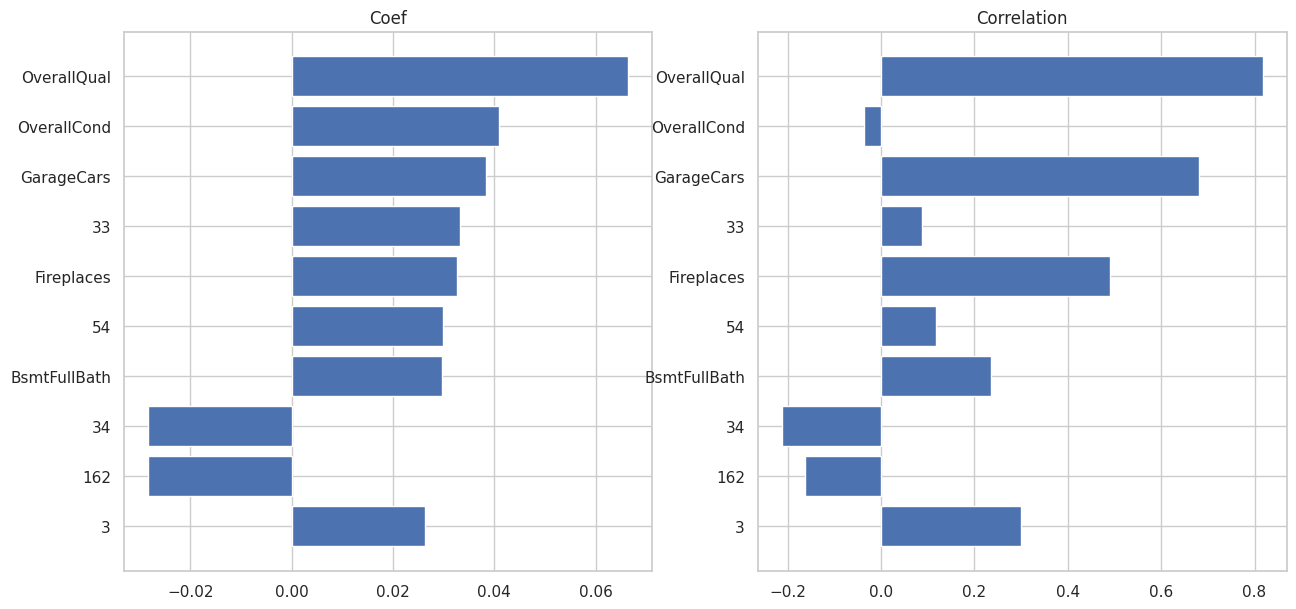

In [724]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title('Coef')
w = cv.best_estimator_.coef_
arg = np.argsort(np.abs(w))[-10:]
clmns = train_x.columns.values[arg]
w = w[arg]

x = np.arange(len(w))
plt.barh(x, w)
plt.yticks(x, clmns);

#array(['3', '162', '34', 'BsmtFullBath', '54', 'Fireplaces', '33',
#       'GarageCars', 'OverallCond', 'OverallQual'], dtype=object)

#clmns[0] = int(clmns[0])

# Convert string array to integer array
clmns= [int(x) if len(x) < 4 else x for x in clmns]

plt.subplot(1, 2, 2)
plt.title('Correlation')
corr = data.corr()
x = np.arange(len(w))
plt.barh(x, corr['logSalePrice'][clmns])
plt.yticks(x, clmns);

**6. Pipeline**

Обработка/фильтрация данных
Добавление новых признаков
Обучение алгоритма
Для удобства все эти этапы можно объединить в один Pipeline.

 **ТОDO

Скейлер ломает линейную регрессию, его надо адаптировать**

In [725]:
data = pd.read_csv('house_prices.csv', index_col='Id')

In [788]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin,BaseEstimator
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

UNIQUE = {c: data[c][~data[c].isnull()].unique() for c in data.columns[data.dtypes == 'object']}

class MyTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, null_threshold):
        self.null_threshold = null_threshold
        self.drop_clmns = []
        self.encoder = None

    def transform(self, x, y=None):
        data = x.copy()

        data.drop(['TotalBsmtSF', 'GarageYrBlt'], axis=1, inplace=True, errors='ignore')
        data.drop(self.drop_clmns, axis=1, inplace=True)

        data = data.fillna(value=self.fill)

        cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(self.encoders, self.cat_clmns)]).T
        cat_ohe = self.ohe.transform(cat_fts).toarray()

        real_clmns = data.columns[data.dtypes != 'object']
        cat_ohe = pd.DataFrame(data=cat_ohe, index=data.index)
        data = pd.concat([data[real_clmns], cat_ohe], axis=1)
        data.columns = data.columns.astype(str)

        return data

    def fit(self, x, y=None):
        data = x.copy()
        data.drop(['TotalBsmtSF', 'GarageYrBlt'], axis=1, inplace=True, errors='ignore')

        # drop and fill NULLs
        clmns = data.columns[data.isnull().any()]
        missed = pd.DataFrame(data[clmns].isnull().sum().sort_values(ascending=False) / data.shape[0], columns=['% NULL'])
        self.drop_clmns = missed[missed['% NULL'] > self.null_threshold].index
        print(self.null_threshold)

        data.drop(self.drop_clmns, axis=1, inplace=True)

        # Fill remaining NULLs
        self.fill = data.apply(lambda s: s.mode()[0] if s.dtype == 'object' else s.median(), axis=0)
        data = data.fillna(value=self.fill)

        # Encode categorical features (str -> int)
        self.cat_clmns = data.columns[data.dtypes == 'object']
        self.encoders = [LabelEncoder().fit(vals) for c, vals in UNIQUE.items() if c in self.cat_clmns]

        cat_fts = np.stack([enc.transform(data[c]) for enc, c in zip(self.encoders, self.cat_clmns)]).T

        self.ohe = OneHotEncoder(handle_unknown='ignore')
        self.ohe.fit(cat_fts)

        return self

class MyScaler(TransformerMixin, BaseEstimator):
    def __init__(self):
        self.scaler = StandardScaler()

    def transform(self, x, y=None):
        x = x.copy()
        x.loc[:, self.clmns] = self.scaler.transform(x[self.clmns])
        return x

    def fit(self, x, y=None):

        cond = x.dtypes == 'float'
        self.clmns = cond[cond].index
        self.scaler.fit(x[self.clmns])

        return self
#https://habr.com/ru/companies/skillfactory/articles/675876/
#kak pisat' preobrazovateli dannyx v scikit
#https://habr.com/ru/companies/otus/articles/754402/
#гиперпараметрического поиска

In [789]:
train_x = data[data['YrSold'] <= 2009]
test_x = data[data['YrSold'] == 2010]

test_y = test_x['SalePrice']
train_y = train_x['SalePrice']

test_x, train_x = test_x.drop('SalePrice', axis=1), train_x.drop('SalePrice', axis=1)

In [790]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('process', MyTransformer(0.)),
    ('scale', MyScaler()),
    ('reg', LinearRegression()),
])


In [791]:
# %debug
import numpy as np
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import FunctionTransformer

params = [{
    'process__null_threshold': [0., 0.005, 0.1],
    'reg': [LinearRegression()]
}, {
    'process__null_threshold': [0., 0.005, 0.1, 0.5, 0.9],
    'reg': [Ridge(), Lasso()],
    'reg__alpha': np.logspace(-4, 4, 9)
}]

train_idxs, val_idxs = np.where(train_x['YrSold'] < 2009)[0], np.where(train_x['YrSold'] == 2009)[0]

print(pipe)
cv = GridSearchCV(pipe, param_grid=params , cv=[[train_idxs, val_idxs]], scoring=mape_scorer)
cv.fit(train_x, np.log(train_y))
cv.cv_results_


Pipeline(steps=[('process', MyTransformer(null_threshold=0.0)),
                ('scale', MyScaler()), ('reg', LinearRegression())])
0.0
0.005
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.005


{'mean_fit_time': array([0.14311481, 0.20812464, 0.23180723, 0.25120091, 0.21527505,
        0.22351646, 0.26227522, 0.25290895, 0.22677636, 0.2523849 ,
        0.25118661, 0.26879215, 0.42158675, 0.23016191, 0.16563487,
        0.20925808, 0.17145157, 0.1518302 , 0.14811826, 0.15192223,
        0.17035437, 0.17772222, 0.15672255, 0.15703773, 0.16629195,
        0.15938568, 0.16836858, 0.15463138, 0.1835835 , 0.17393851,
        0.31219554, 0.22823691, 0.16629052, 0.21440291, 0.16901612,
        0.16626644, 0.16053963, 0.17310071, 0.16609716, 0.1930542 ,
        0.18131542, 0.17311382, 0.17103863, 0.18299174, 0.17516899,
        0.17364812, 0.18694401, 0.17736006, 0.30660176, 0.21540618,
        0.30430555, 0.36886644, 0.30755663, 0.25231385, 0.58199716,
        0.26163411, 0.2855792 , 0.29196191, 0.18113947, 0.19166017,
        0.17702365, 0.18028593, 0.18708253, 0.194731  , 0.18003392,
        0.19195509, 0.34358835, 0.24532509, 0.21605897, 0.27402043,
        0.20544195, 0.19119096,

In [792]:
cv_grid = pd.DataFrame(cv.cv_results_['params'])
cv_grid['val MAPE'] = -cv.cv_results_['mean_test_score']
cv_grid['reg__alpha'] = cv_grid['reg__alpha'].fillna('0.')
cv_grid['reg'] = cv_grid['reg'].apply(lambda x: x.__class__.__name__)
cv_grid

,process__null_threshold,reg,reg__alpha,val MAPE
0,0.000,LinearRegression,0.,inf
1,0.005,LinearRegression,0.,inf
2,0.100,LinearRegression,0.,inf
3,0.000,Ridge,0.0001,9.590605
4,0.000,Ridge,0.001,9.590589
...,...,...,...,...
88,0.900,Lasso,1.0,15.856530
89,0.900,Lasso,10.0,21.188478
90,0.900,Lasso,100.0,30.592175
91,0.900,Lasso,1000.0,35.499391


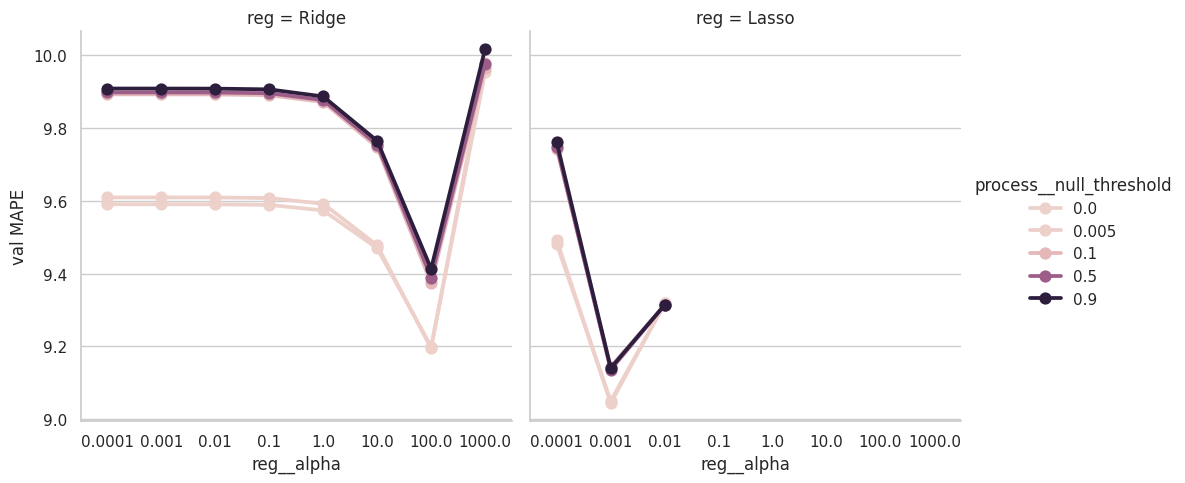

In [793]:
sns.catplot(x='reg__alpha', y='val MAPE', data=cv_grid[cv_grid['val MAPE'] < 12], col='reg',
            hue='process__null_threshold', kind='point')